In [21]:
#importando a biblioteca Pandas
import pandas as pd

In [40]:
import matplotlib.pyplot as plt

In [96]:
#Fonte de dados: Sistema Nacional de Emprego - Sine Aberto, PORTAL BRASILEIRO DE DADOS ABERTOS, 2021. Disponível em: <https://dados.gov.br/dataset/sine-aberto>Acesso em: 29 de set. de 2021.
#Dados referentes ao dia 19/04/2021.
df = pd.read_csv('D_ETL_IMO_EXTRACAO_SINE_ABERTO_TRABALHADORES_MG.csv', sep=';', encoding='latin-1')
df.head()

,NACIONALIDADE,DEFICIENCIAS,BAIRRO,CEP,CODIGO_MUNICIPIO_IBGE,NOME_MUNICIPIO,UF,ESCOLARIDADE,ESTUDANTE,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC
0,BRASILEIRA,NaN,CENTRO,35588000.0,310420,ARCOS,MG,Médio Incompleto,N,Nenhum,N,N,N,N
1,BRASILEIRA,NaN,NaN,30514005.0,310620,BELO HORIZONTE,MG,Médio Completo,N,Nenhum,N,S,S,S
2,BRASILEIRA,NaN,JARDIM EUROPA,38414700.0,317020,UBERLANDIA,MG,Médio Completo,N,Nenhum,N,S,S,S
3,BRASILEIRA,NaN,SAO LUCAS,35528034.0,314520,NOVA SERRANA,MG,Médio Incompleto,N,Nenhum,N,N,N,N
4,IGNORADO,NaN,NaN,38800000.0,316210,SAO GOTARDO,MG,Fundamental Completo,N,Nenhum,N,N,N,N


In [23]:
df.tail()

,NACIONALIDADE,DEFICIENCIAS,BAIRRO,CEP,CODIGO_MUNICIPIO_IBGE,NOME_MUNICIPIO,UF,ESCOLARIDADE,ESTUDANTE,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC
1048570,BRASILEIRA,NaN,PRAIA DOS BANDEIRANTES,34525000.0,315670,SABARA,MG,Fundamental Incompleto,N,Nenhum,N,N,N,N
1048571,BRASILEIRA,NaN,FABRICA,36700328.0,313840,LEOPOLDINA,MG,Médio Completo,N,AB,N,N,N,N
1048572,BRASILEIRA,NaN,NaN,38701153.0,314800,PATOS DE MINAS,MG,Não Identificado,N,AB,N,N,N,N
1048573,BRASILEIRA,NaN,SANTA ZITA,35300275.0,311340,CARATINGA,MG,Médio Incompleto,N,Nenhum,N,S,S,S
1048574,BRASILEIRA,NaN,VILA NOSSA SENHORA APARECID,31525041.0,310620,BELO HORIZONTE,MG,Fundamental Incompleto,N,Nenhum,N,N,N,N


In [5]:
#Quantidade de dados em cada coluna
df.count()

NACIONALIDADE            1048575
DEFICIENCIAS                5739
BAIRRO                    525784
CEP                      1048456
CODIGO_MUNICIPIO_IBGE    1048575
NOME_MUNICIPIO           1048575
UF                       1048575
ESCOLARIDADE             1048575
ESTUDANTE                1048575
HABILITACAO              1048575
VEICULOS                 1048575
DISP_VIAJAR              1048575
DISP_DORMIR_EMP          1048575
DISP_AUSENTAR_DOMIC      1048575
dtype: int64

In [6]:
#Quantidade de dados não informados em cada coluna
df.isna().sum()

NACIONALIDADE                  0
DEFICIENCIAS             1042836
BAIRRO                    522791
CEP                          119
CODIGO_MUNICIPIO_IBGE          0
NOME_MUNICIPIO                 0
UF                             0
ESCOLARIDADE                   0
ESTUDANTE                      0
HABILITACAO                    0
VEICULOS                       0
DISP_VIAJAR                    0
DISP_DORMIR_EMP                0
DISP_AUSENTAR_DOMIC            0
dtype: int64

In [97]:
#Apaguei as colunas que não serão utilizadas na análise
df.drop(['BAIRRO', 'CEP', 'CODIGO_MUNICIPIO_IBGE'], axis=1, inplace=True)

In [100]:
df.dtypes

NACIONALIDADE          object
DEFICIENCIAS           object
NOME_MUNICIPIO         object
UF                     object
ESCOLARIDADE           object
ESTUDANTE              object
HABILITACAO            object
VEICULOS               object
DISP_VIAJAR            object
DISP_DORMIR_EMP        object
DISP_AUSENTAR_DOMIC    object
dtype: object

In [101]:
#A maioria dos trabalhadores que informaram seus dados estão na cidade de Belo Horizonte
df.groupby(['NOME_MUNICIPIO']).size().sort_values(ascending=False)

NOME_MUNICIPIO
BELO HORIZONTE      127839
UBERLANDIA           59794
CONTAGEM             41973
JUIZ DE FORA         26196
BETIM                25699
                     ...  
CEDRO DO ABAETE         11
NOVA BELEM              10
SERRA DA SAUDADE        10
GRUPIARA                10
NACIP RAYDAN             9
Length: 853, dtype: int64

In [98]:
#Separação do dataframe por pessoas que não informaram se possuem alguma deficiência
dfnaoinfodeficiente = df.loc[df.DEFICIENCIAS.isna()]
dfnaoinfodeficiente

,NACIONALIDADE,DEFICIENCIAS,NOME_MUNICIPIO,UF,ESCOLARIDADE,ESTUDANTE,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC
0,BRASILEIRA,NaN,ARCOS,MG,Médio Incompleto,N,Nenhum,N,N,N,N
1,BRASILEIRA,NaN,BELO HORIZONTE,MG,Médio Completo,N,Nenhum,N,S,S,S
2,BRASILEIRA,NaN,UBERLANDIA,MG,Médio Completo,N,Nenhum,N,S,S,S
3,BRASILEIRA,NaN,NOVA SERRANA,MG,Médio Incompleto,N,Nenhum,N,N,N,N
4,IGNORADO,NaN,SAO GOTARDO,MG,Fundamental Completo,N,Nenhum,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...
1048570,BRASILEIRA,NaN,SABARA,MG,Fundamental Incompleto,N,Nenhum,N,N,N,N
1048571,BRASILEIRA,NaN,LEOPOLDINA,MG,Médio Completo,N,AB,N,N,N,N
1048572,BRASILEIRA,NaN,PATOS DE MINAS,MG,Não Identificado,N,AB,N,N,N,N
1048573,BRASILEIRA,NaN,CARATINGA,MG,Médio Incompleto,N,Nenhum,N,S,S,S


In [25]:
dfnaoinfodeficiente.groupby(['ESCOLARIDADE']).size().sort_values(ascending=False)

ESCOLARIDADE
Médio Completo            569180
Médio Incompleto          105834
Fundamental Completo      100116
Não Identificado           95547
Superior Completo          74262
Superior Incompleto        46120
Fundamental Incompleto     33439
Nenhum                     11009
Analfabeto                  4293
Especialização              2362
Mestrado                     595
Doutorado                     79
dtype: int64

Text(0, 0.5, 'Escolaridade')

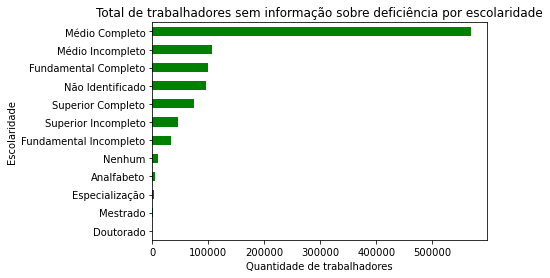

In [82]:
dfnaoinfodeficiente["ESCOLARIDADE"].value_counts(ascending=True).plot.barh(title="Total de trabalhadores sem informação sobre deficiência por escolaridade", color="green")
plt.xlabel("Quantidade de trabalhadores")
plt.ylabel("Escolaridade")

In [83]:
dfnaoinfodeficiente.groupby(['ESTUDANTE']).size().sort_values(ascending=False)

ESTUDANTE
N    951338
S     91498
dtype: int64

<AxesSubplot:title={'center':'Trabalhadores que estudam sem deficiência informada'}, ylabel='None'>

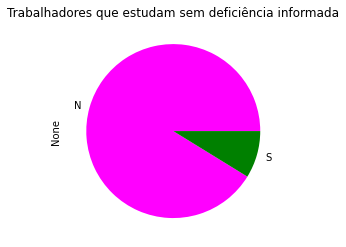

In [90]:
c  = ["magenta", "green"]
dfnaoinfodeficiente.groupby(['ESTUDANTE']).size().plot.pie(title="Trabalhadores que estudam sem deficiência informada", colors=c)

In [26]:
dfnaoinfodeficiente.groupby(['HABILITACAO']).size().sort_values(ascending=False)

HABILITACAO
Nenhum    800046
B          97658
AB         65765
A          23965
AD         21359
D          17699
AE          8216
E           5360
AC          1390
C           1378
dtype: int64

(array([800046.,  17699.,  97658.,  23965.,  65765.,  21359.,   8216.,
          1390.,   5360.,   1378.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

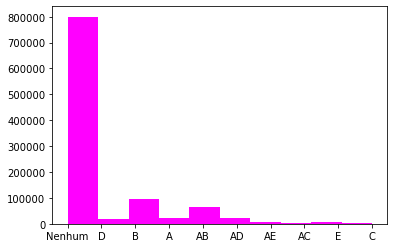

In [106]:
plt.hist(dfnaoinfodeficiente["HABILITACAO"], color ="magenta")

In [27]:
dfnaoinfodeficiente.groupby(['DISP_VIAJAR']).size().sort_values(ascending=False)

DISP_VIAJAR
N    829231
S    213605
dtype: int64

<AxesSubplot:title={'center':'Disponibilidade para viajar dos trabalhadores sem deficiência informada'}, ylabel='None'>

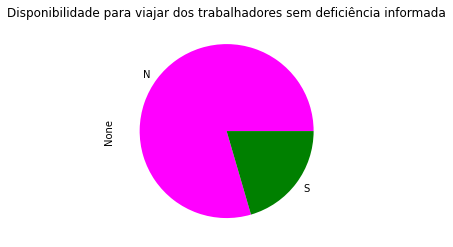

In [78]:
c  = ["magenta", "green"]
dfnaoinfodeficiente.groupby(['DISP_VIAJAR']).size().plot.pie(title="Disponibilidade para viajar dos trabalhadores sem deficiência informada", colors=c)

In [28]:
dfnaoinfodeficiente.groupby(['DISP_DORMIR_EMP']).size().sort_values(ascending=False)

DISP_DORMIR_EMP
N    845741
S    197095
dtype: int64

<AxesSubplot:title={'center':'Disponibilidade para dormir no emprego dos trabalhadores sem deficiência informada'}, ylabel='None'>

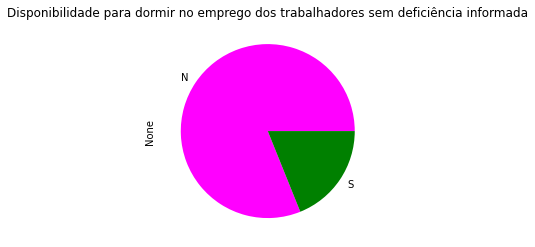

In [104]:
c  = ["magenta", "green"]
dfnaoinfodeficiente.groupby(['DISP_DORMIR_EMP']).size().plot.pie(title="Disponibilidade para dormir no emprego dos trabalhadores sem deficiência informada", colors=c)

In [99]:
#Separação do dataframe por pessoas que informaram que possuem deficiência
dfdeficiente = df.loc[~df.DEFICIENCIAS.isna()]
dfdeficiente

,NACIONALIDADE,DEFICIENCIAS,NOME_MUNICIPIO,UF,ESCOLARIDADE,ESTUDANTE,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC
546,BRASILEIRA,Mental/Intelectual,OURO PRETO,MG,Médio Incompleto,N,Nenhum,N,S,S,S
618,BRASILEIRA,Membros Inferiores|Membros Superiores,PATOS DE MINAS,MG,Médio Completo,N,Nenhum,N,N,N,N
743,BRASILEIRA,Um membro Inferior|Um membro superior,BELO HORIZONTE,MG,Médio Incompleto,S,Nenhum,N,N,N,N
761,BRASILEIRA,Mental/Intelectual,BELO HORIZONTE,MG,Fundamental Incompleto,N,Nenhum,N,N,N,N
881,BRASILEIRA,Baixa Visão,BELO HORIZONTE,MG,Especialização,S,Nenhum,N,S,S,S
...,...,...,...,...,...,...,...,...,...,...,...
1048117,BRASILEIRA,Membros Inferiores,BELO HORIZONTE,MG,Superior Incompleto,N,B,S,S,S,S
1048175,BRASILEIRA,Um membro superior|Parcial,BELO HORIZONTE,MG,Médio Completo,N,B,N,N,N,N
1048335,BRASILEIRA,Um membro Inferior,BELO HORIZONTE,MG,Médio Completo,N,Nenhum,N,N,N,N
1048402,BRASILEIRA,Surdez bilateral parcial|Baixa Visão,OURO BRANCO,MG,Fundamental Incompleto,S,Nenhum,N,S,S,S


In [17]:
dfdeficiente.groupby(['ESCOLARIDADE']).size().sort_values(ascending=False)

ESCOLARIDADE
Médio Completo            3009
Médio Incompleto           608
Fundamental Completo       478
Superior Incompleto        407
Fundamental Incompleto     407
Superior Completo          388
Não Identificado           238
Nenhum                     155
Especialização              25
Analfabeto                  23
Mestrado                     1
dtype: int64

Text(0, 0.5, 'Escolaridade')

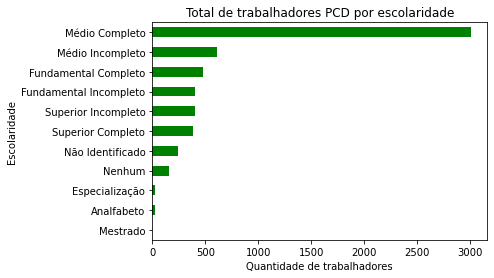

In [55]:
dfdeficiente["ESCOLARIDADE"].value_counts(ascending=True).plot.barh(title="Total de trabalhadores PCD por escolaridade", color="green")
plt.xlabel("Quantidade de trabalhadores")
plt.ylabel("Escolaridade")

In [18]:
dfdeficiente.groupby(['HABILITACAO']).size().sort_values(ascending=False)

HABILITACAO
Nenhum    4333
B          767
AB         338
A          137
D           62
AD          61
AE          19
E           11
C            8
AC           3
dtype: int64

(array([4.333e+03, 7.670e+02, 6.100e+01, 3.380e+02, 1.370e+02, 6.200e+01,
        3.000e+00, 1.900e+01, 1.100e+01, 8.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

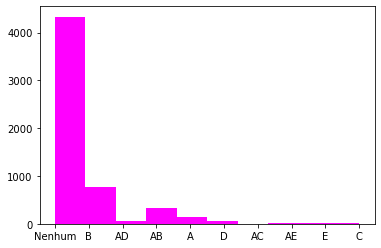

In [86]:
plt.hist(dfdeficiente["HABILITACAO"], color ="magenta")

In [19]:
dfdeficiente.groupby(['DISP_VIAJAR']).size().sort_values(ascending=False)

DISP_VIAJAR
N    3364
S    2375
dtype: int64

<AxesSubplot:title={'center':'Disponibilidade para viajar dos trabalhadores com deficiência'}, ylabel='None'>

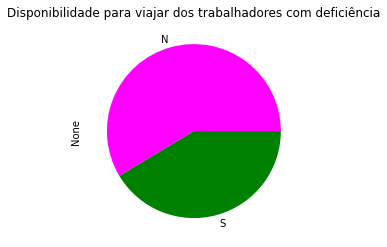

In [89]:
c = ["magenta", "green"]
dfdeficiente.groupby(['DISP_VIAJAR']).size().plot.pie(title="Disponibilidade para viajar dos trabalhadores com deficiência", colors=c)

In [20]:
dfdeficiente.groupby(['DISP_DORMIR_EMP']).size().sort_values(ascending=False)

DISP_DORMIR_EMP
N    3472
S    2267
dtype: int64

<AxesSubplot:title={'center':'Disponibilidade para dormir no emprego dos trabalhadores com deficiência'}, ylabel='None'>

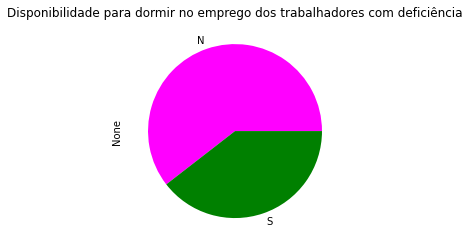

In [105]:
c  = ["magenta", "green"]
dfdeficiente.groupby(['DISP_DORMIR_EMP']).size().plot.pie(title="Disponibilidade para dormir no emprego dos trabalhadores com deficiência", colors=c)

In [91]:
dfdeficiente.groupby(['ESTUDANTE']).size().sort_values(ascending=False)

ESTUDANTE
N    4947
S     792
dtype: int64

<AxesSubplot:title={'center':'Trabalhadores com deficiência que estudam'}, ylabel='None'>

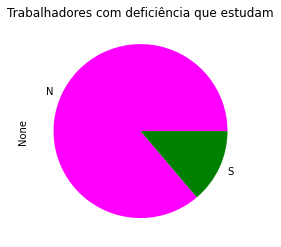

In [92]:
c  = ["magenta", "green"]
dfdeficiente.groupby(['ESTUDANTE']).size().plot.pie(title="Trabalhadores com deficiência que estudam", colors=c)